<a href="https://colab.research.google.com/github/putriindrawahyuningsih/Pemrograman_Python/blob/main/TugasPython11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
cd /content/drive/MyDrive/Colab Notebooks/PYTHON


/content/drive/MyDrive/Colab Notebooks/PYTHON


In [20]:
ls

DAUN.jpg  GMB/


In [22]:
# import the necessary packagages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [23]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("GMB")
data = []
labels = []

[INFO] loading images...


In [24]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [25]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [26]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [28]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [29]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [31]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [32]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [35]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [36]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 67ms/step - loss: 1.6173 - accuracy: 0.2626 - val_loss: 1.5406 - val_accuracy: 0.3836
Epoch 2/25
14/14 [==============================] - 1s 58ms/step - loss: 1.5153 - accuracy: 0.3767 - val_loss: 1.4377 - val_accuracy: 0.4315
Epoch 3/25
14/14 [==============================] - 1s 59ms/step - loss: 1.3739 - accuracy: 0.4292 - val_loss: 1.3015 - val_accuracy: 0.4932
Epoch 4/25
14/14 [==============================] - 1s 59ms/step - loss: 1.2380 - accuracy: 0.5046 - val_loss: 1.1937 - val_accuracy: 0.5068
Epoch 5/25
14/14 [==============================] - 1s 58ms/step - loss: 1.0847 - accuracy: 0.5753 - val_loss: 1.0955 - val_accuracy: 0.5479
Epoch 6/25
14/14 [==============================] - 1s 61ms/step - loss: 0.9686 - accuracy: 0.6119 - val_loss: 1.0513 - val_accuracy: 0.5342
Epoch 7/25
14/14 [==============================] - 1s 62ms/step - loss: 0.8969 - accuracy: 0.6826 - val_loss: 0.9791 - val_accuracy: 0.6027
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


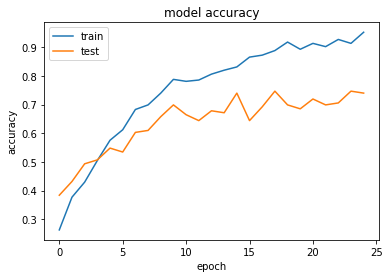

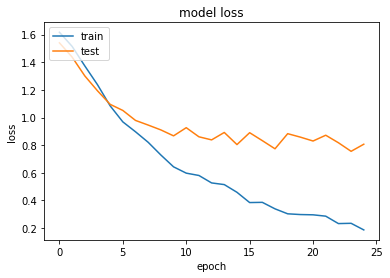

In [37]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.61      0.85      0.71        27
      GMB_02       0.83      0.66      0.73        29
      GMB_03       0.79      0.83      0.81        23
      GMB_04       0.75      0.60      0.67        35
      GMB_05       0.79      0.81      0.80        32

    accuracy                           0.74       146
   macro avg       0.75      0.75      0.74       146
weighted avg       0.75      0.74      0.74       146



In [39]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [40]:
import cv2
import matplotlib.pyplot as plt
image1='DAUN.jpg'

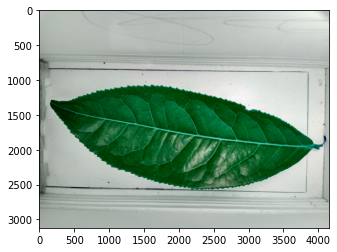

In [41]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))


In [42]:
image_testing = Image.open('DAUN.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [43]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [44]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.33281377 0.38388392 0.28330225]]
['GMB_02']
